In [1]:
import copy
import networkx as nx

from regraph.hierarchy import Hierarchy
from regraph.rules import Rule

from regraph import primitives
from regraph import plotting

In [2]:
hierarchy = Hierarchy()
colors = nx.DiGraph()
primitives.add_nodes_from(
    colors,
    ["red", "blue"]
)
primitives.add_edges_from(
    colors,
    [("red", "red"), ("blue", "red"), ("red", "blue")]
)
hierarchy.add_graph("colors", colors)

mmm = nx.DiGraph()
primitives.add_nodes_from(
    mmm,
    ["component", "state", "action"]
)

primitives.add_edges_from(
    mmm,
    [("component", "action"),
     ("component", "component"),
     ("state", "component"),
     ("action", "state")]
)

hierarchy.add_graph("mmm", mmm)

mm = nx.DiGraph()
primitives.add_nodes_from(
    mm,
    ["gene", "residue", "state", "mod"]
)
primitives.add_edges_from(
    mm,
    [("residue", "gene"),
     ("state", "gene"),
     ("state", "residue"),
     ("mod", "state"),
     ("gene", "mod")
    ]
)
hierarchy.add_graph("mm", mm)

action_graph = nx.DiGraph()
primitives.add_nodes_from(
    action_graph,
    ["A", "A_res_1", "p", "B", "mod"]
)

primitives.add_edges_from(
    action_graph,
    [("A_res_1", "A"),
     ("p", "A_res_1"),
     ("mod", "p"),
     ("B", "mod")]
)
hierarchy.add_graph(
    "ag", action_graph
)

nugget_1 = nx.DiGraph()
primitives.add_nodes_from(
    nugget_1,
    ["A", "A_res_1", "p", "B", "mod"]
)
primitives.add_edges_from(
    nugget_1,
    [("A_res_1", "A"),
     ("p", "A_res_1"),
     ("mod", "p"),
     ("B", "mod")]
)
hierarchy.add_graph(
    "n1", nugget_1
)

# add typings
hierarchy.add_typing(
    "mm", "mmm",
    {
        "gene" : "component",
        "residue": "component",
        "state": "state",
        "mod": "action"
    }, total=True
)

hierarchy.add_typing(
    "mm", "colors",
    {
        "gene": "red",
        "residue": "red",
        "state": "red",
        "mod": "blue"
    }
)
hierarchy.add_typing(
    "ag", "mm",
    {
        "A": "gene",
        "B": "gene",
        "A_res_1": "residue",
        "mod" : "mod",
        "p": "state"
    }, total=True
)
hierarchy.add_typing(
    "n1", "ag",
    dict((n, n) for n in nugget_1.nodes()),
    total=True
)

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


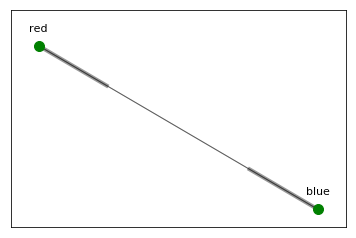

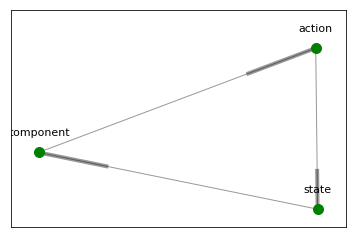

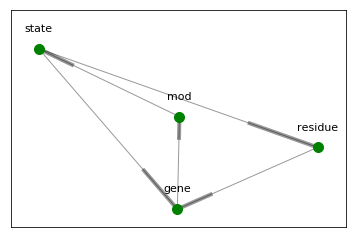

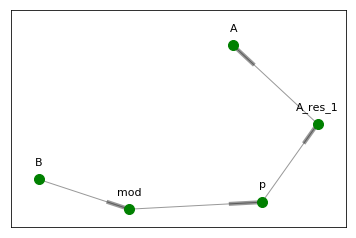

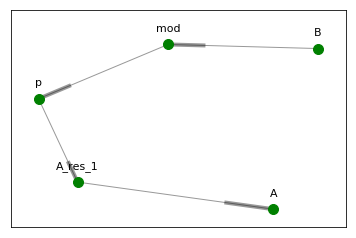

{'A': array([ 0.64043117,  0.        ]),
 'A_res_1': array([ 0.10632308,  0.16449653]),
 'B': array([ 0.76124625,  0.97522818]),
 'mod': array([ 0.35323496,  1.        ]),
 'p': array([ 0.        ,  0.67025842])}

In [3]:
plotting.plot_graph(hierarchy.node["colors"].graph)
plotting.plot_graph(hierarchy.node["mmm"].graph)
plotting.plot_graph(hierarchy.node["mm"].graph)
plotting.plot_graph(hierarchy.node["ag"].graph)
plotting.plot_graph(hierarchy.node["n1"].graph)

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


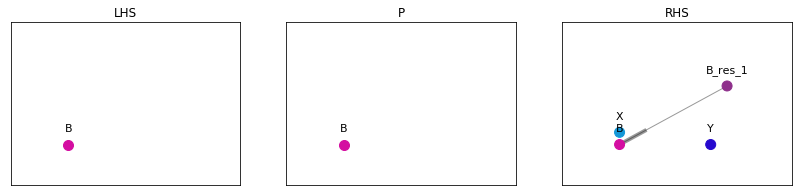

ADD_NODE B_res_1 {}.
ADD_NODE X {}.
ADD_NODE Y {}.
ADD_EDGE B_res_1 B {}.



In [4]:
p = nx.DiGraph()
primitives.add_nodes_from(
    p, ["B"]
)

l = nx.DiGraph()
primitives.add_nodes_from(
    l, ["B"]
)

r = nx.DiGraph()
primitives.add_nodes_from(
    r, ["B", "B_res_1", "X", "Y"]
)
primitives.add_edge(r, "B_res_1", "B")

rule = Rule(p, l, r)
plotting.plot_rule(rule)

instance = {"B": "B"}

rhs_typing = {"mm": {"B_res_1": "residue"}, "mmm": {"X": "component"}, "colors": {"Y": "red"}}
print(rule.to_commands())


In [5]:
hierarchy.rewrite("n1", rule, instance, lhs_typing=None, rhs_typing=rhs_typing)

(None, None)

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


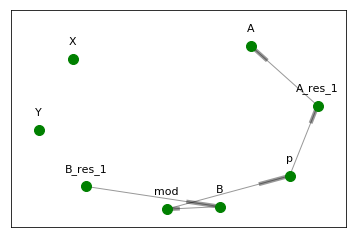

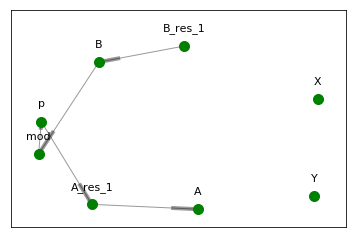

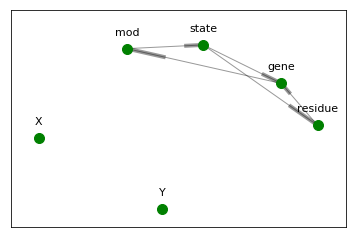

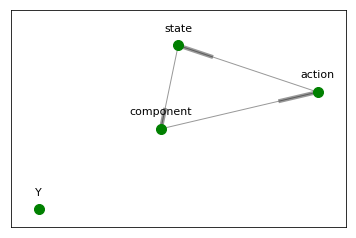

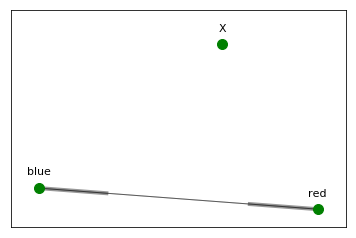

{'X': array([ 0.34666428,  1.        ]),
 'blue': array([ 0.        ,  0.12797512]),
 'red': array([ 0.52596216,  0.        ])}

In [6]:
plotting.plot_graph(hierarchy.node["n1"].graph)
plotting.plot_graph(hierarchy.node["ag"].graph)
plotting.plot_graph(hierarchy.node["mm"].graph)
plotting.plot_graph(hierarchy.node["mmm"].graph)
plotting.plot_graph(hierarchy.node["colors"].graph)

In [7]:
print(hierarchy.edge["n1"]["ag"].mapping)
print(hierarchy.edge["ag"]["mm"].mapping)
print(hierarchy.edge["mm"]["mmm"].mapping)
print(hierarchy.edge["mm"]["colors"].mapping)

{'A': 'A', 'A_res_1': 'A_res_1', 'p': 'p', 'B': 'B', 'mod': 'mod', 'B_res_1': 'B_res_1', 'X': 'X', 'Y': 'Y'}
{'A': 'gene', 'A_res_1': 'residue', 'p': 'state', 'B': 'gene', 'mod': 'mod', 'B_res_1': 'residue', 'X': 'X', 'Y': 'Y'}
{'gene': 'component', 'residue': 'component', 'state': 'state', 'mod': 'action', 'X': 'component', 'Y': 'Y'}
{'gene': 'red', 'residue': 'red', 'state': 'red', 'mod': 'blue', 'X': 'X', 'Y': 'red'}


In [8]:
p = nx.DiGraph()
p.add_nodes_from([1, 2])
p.add_edges_from([(2, 1)])
merging_rule = Rule.from_transform(p)
merging_rule.remove_edge(2, 1)
merging_rule.merge_nodes(1, 2, "hybrid")

lhs_typing = {"mm": {1: "gene", 2: "residue"}}
rhs_typing = {"mmm": {"hybrid": "component"}}

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


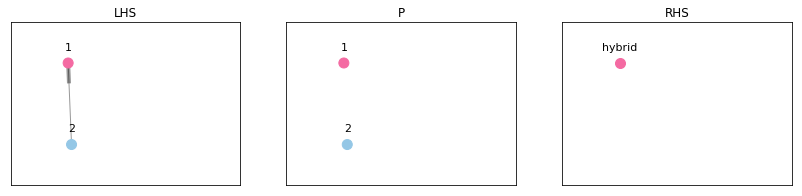

DELETE_EDGE 2 1.
MERGE [1, 2] AS 'hybrid'.



In [9]:
plotting.plot_rule(merging_rule)
print(merging_rule.to_commands())

In [10]:
instances = hierarchy.find_matching("n1", merging_rule.lhs, lhs_typing)
print(instances)

[{1: 'A', 2: 'A_res_1'}, {1: 'B', 2: 'B_res_1'}]


In [11]:
hierarchy.rewrite("n1", merging_rule, instances[0], lhs_typing, rhs_typing)

(None, None)

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


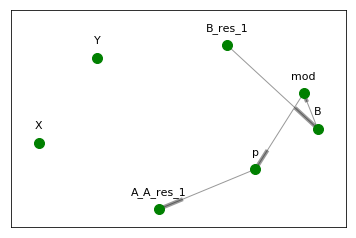

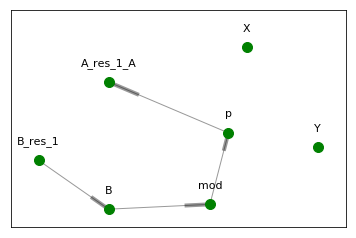

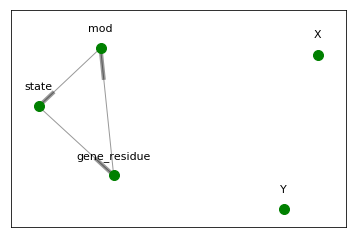

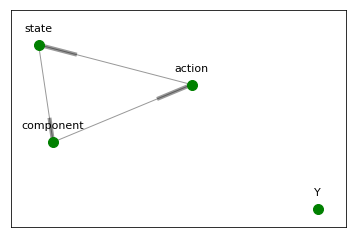

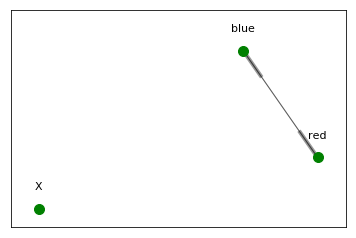

{'X': array([ 0.,  0.]),
 'blue': array([ 0.7329806 ,  0.70316109]),
 'red': array([ 1.        ,  0.22920221])}

In [12]:
plotting.plot_graph(hierarchy.node["n1"].graph)
plotting.plot_graph(hierarchy.node["ag"].graph)
plotting.plot_graph(hierarchy.node["mm"].graph)
plotting.plot_graph(hierarchy.node["mmm"].graph)
plotting.plot_graph(hierarchy.node["colors"].graph)

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


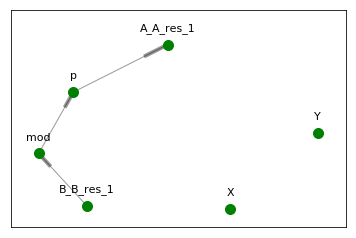

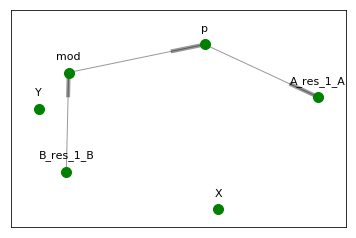

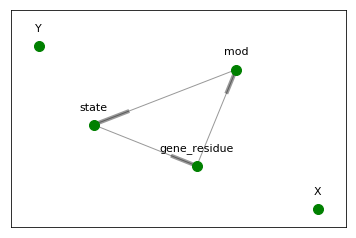

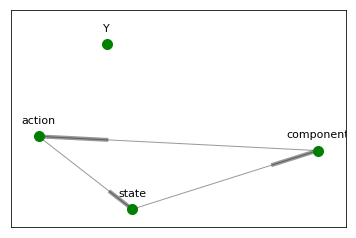

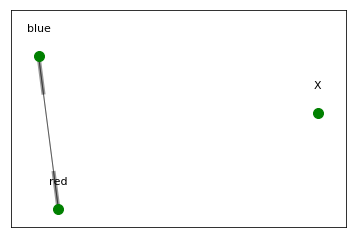

{'X': array([ 1.        ,  0.33819539]),
 'blue': array([ 0.        ,  0.53851404]),
 'red': array([ 0.07114324,  0.        ])}

In [14]:
hierarchy.rewrite("n1", merging_rule, instances[1])
plotting.plot_graph(hierarchy.node["n1"].graph)
plotting.plot_graph(hierarchy.node["ag"].graph)
plotting.plot_graph(hierarchy.node["mm"].graph)
plotting.plot_graph(hierarchy.node["mmm"].graph)
plotting.plot_graph(hierarchy.node["colors"].graph)

In [15]:
p = nx.DiGraph()
p.add_nodes_from([1, 2])
p.add_edges_from([(2, 1)])
merging_rule1 = Rule.from_transform(p)
merging_rule1.remove_edge(2, 1)
merging_rule1.merge_nodes(1, 2, "hybrid")

lhs_typing = {"mm": {1: "state", 2: "mod"}}
rhs_typing = {"mmm": {"hybrid": "component"}}

In [16]:
instances = hierarchy.find_matching("n1", merging_rule1.lhs, lhs_typing)
print(instances)

[{1: 'p', 2: 'mod'}]


In [17]:
hierarchy.rewrite("n1", merging_rule1, instances[0], lhs_typing, rhs_typing)

RewritingError: Typing of the rhs is self inconsistent: Node 'hybrid' is typed as 'action' and '{'component'}' in the graph 'mmm'